In [3]:
#recurrent neural network LSTM to predict stock price (exemple apple APPL)
#tutorial YOUTUBE
#https://www.youtube.com/watch?v=QIUxPv5PJOY
import math
import tensorflow as tf
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import fix_yahoo_finance as fyf
import yfinance as yf
plt.style.use('fivethirtyeight')

In [4]:
#get the stock quote
yf.pdr_override()
df=web.get_data_yahoo('ADP.PA',start='2012-01-01', end='2022-03-14')
df.shape
df
#plt.plot(df['High'],c='r')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-02,53.000000,53.200001,52.840000,53.000000,42.526665,34229
2012-01-03,53.000000,53.080002,52.860001,53.000000,42.526665,98340
2012-01-04,52.799999,53.070000,52.750000,52.770000,42.342102,70336
2012-01-05,52.799999,52.869999,51.619999,51.799999,41.563786,102834
2012-01-06,51.799999,52.410000,51.619999,52.000000,41.724266,215258
...,...,...,...,...,...,...
2022-03-07,115.000000,117.349998,111.400002,113.550003,113.550003,187212
2022-03-08,110.599998,115.949997,110.000000,113.849998,113.849998,196305
2022-03-09,117.300003,122.199997,116.800003,120.900002,120.900002,175222


In [5]:
donne=df.drop(['Open','Low','High','Adj Close','Volume'],axis=1)

,Close
Date,
2012-01-02,53.000000
2012-01-03,53.000000
2012-01-04,52.770000
2012-01-05,51.799999
2012-01-06,52.000000
...,...
2022-03-07,113.550003
2022-03-08,113.849998
2022-03-09,120.900002


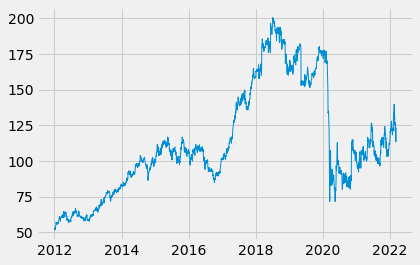

In [6]:
plt.plot(donne,linewidth=1)
donne

In [7]:
#convert to numpy array
data_set=donne.values
data_set.shape



(2608, 1)

In [8]:
#tronquer la data set pour entrainer
training_dataset_len=math.ceil(len(data_set)*0.8)

training_dataset_len

2087

In [9]:
#scale the data in range (0,1)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data_set)




In [10]:
#create training data with training_dataset_len
train_data=scaled_data[0:training_dataset_len,:]
#split data in x_train and y_train
x_train=[]
y_train=[]



In [11]:
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        

#x_train et y _train ne sont que des Liste de liste
#il faut les convertir en np.array (block suiv)

[array([0.00806452, 0.00806452, 0.00651883, 0.        , 0.00134409,
       0.        , 0.01189516, 0.00961022, 0.01438172, 0.01458335,
       0.01989247, 0.02748656, 0.03024193, 0.03534948, 0.03185485,
       0.03447581, 0.03225806, 0.03219086, 0.03380378, 0.0295699 ,
       0.0247984 , 0.03125001, 0.03326613, 0.03165322, 0.03017474,
       0.02822581, 0.03145161, 0.03017474, 0.0311156 , 0.03172044,
       0.03319894, 0.03219086, 0.03810485, 0.03770162, 0.04032258,
       0.05073924, 0.05416667, 0.05376344, 0.0561156 , 0.06223119,
       0.05510753, 0.05168012, 0.05040322, 0.05557796, 0.05517472,
       0.05033603, 0.03998656, 0.04919354, 0.05591397, 0.05719087,
       0.05880376, 0.06041668, 0.06001344, 0.05846774, 0.06182796,
       0.06344087, 0.05981184, 0.05961021, 0.05813173, 0.06216398])]
[0.06807796102594738]


In [12]:
#convert x_train and y_trin to numpy array

x_train, y_train=np.array(x_train),np.array(y_train)

print(x_train.shape,y_train.shape)
#Il manque un "axe" => utilisation de reshape (Block suiv)

(2027, 60) (2027,)


In [13]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2027, 60, 1)

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2027/2027 [==============================] - 23s 10ms/step - loss: 0.0024
Epoch 2/2
2027/2027 [==============================] - 21s 10ms/step - loss: 7.8600e-04


In [19]:
#create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_dataset_len-60:,:]

print(training_dataset_len,scaled_data.shape,test_data.shape)
#create the data sets x_test and y_test
x_test=[]
y_test=data_set[training_dataset_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

2087 (2608, 1) (581, 1)


In [20]:
#convert the data to numpy array
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [21]:
#get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)




In [22]:
#get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.1997181019261336

C:\Users\DLA\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


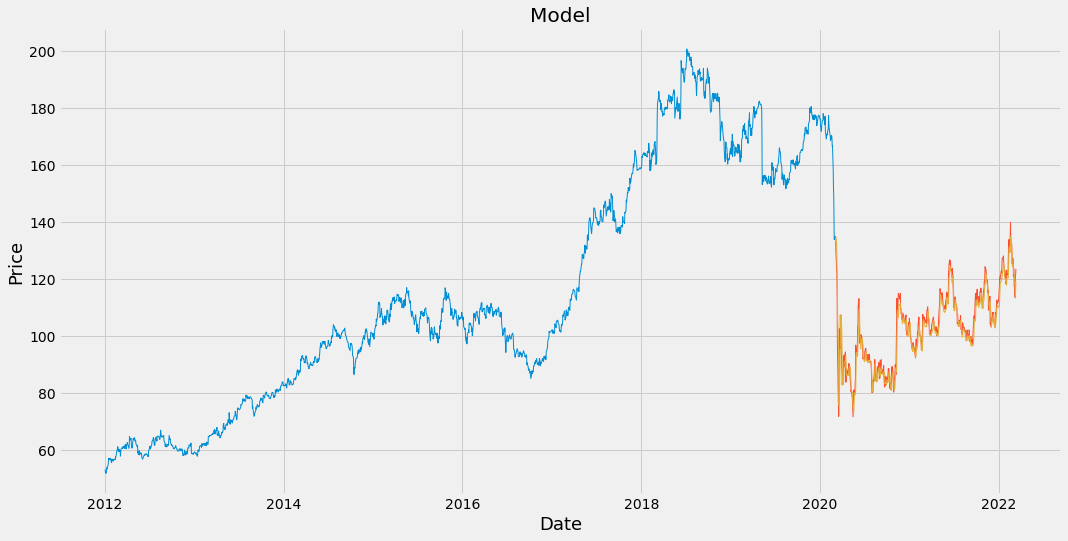

In [25]:
#plot data

train=donne[:training_dataset_len]
valid=donne[training_dataset_len:]
valid['Predictions']=predictions


#min 39.56

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.plot(train['Close'],linewidth=1)
plt.plot(valid[['Close','Predictions']],linewidth=1)
plt.show()


In [26]:
#ma tentative de prediction
print(scaled_data.size)
montest_data=scaled_data[scaled_data.size-60:,:]
print(montest_data.size)
dureeprediction=100
resultats=[]
for i in range(dureeprediction):
    monx_test=[]
    monx_test.append(montest_data[:,0])


    monx_test=np.array(monx_test)
    monx_test=np.reshape(monx_test,(monx_test.shape[0],monx_test.shape[1],1))


    maprediction=model.predict(monx_test)
#print(monx_test.shape)
#print('prediction du jour scalée',maprediction)

    montest_data=np.append(montest_data,maprediction,axis=0)

#print(montest_data.size)
#print('montest data mAJ',montest_data)
    maprediction=scaler.inverse_transform(maprediction)
#print('prediction du jour',maprediction)
    #resultats=np.append(resultats,maprediction,axis=0)

mapredictionresultat=scaler.inverse_transform(montest_data[montest_data.size-dureeprediction:])
print(mapredictionresultat)

2608
60


ValueError: in user code:

    File "C:\Users\DLA\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\DLA\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DLA\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\DLA\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\DLA\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DLA\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 60, 1), found shape=(None, 61, 1)


NameError: name 'jours' is not defined

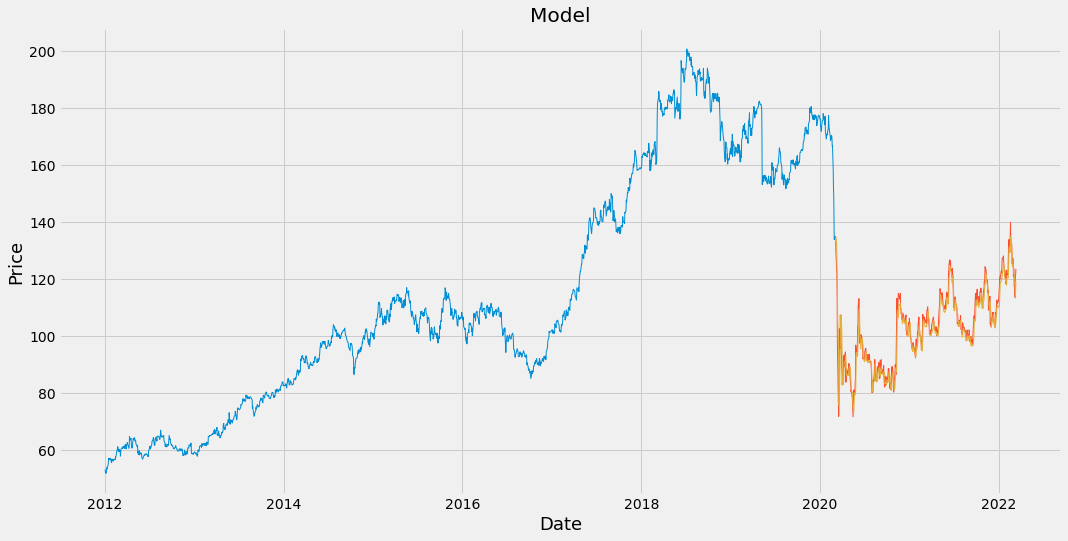

In [27]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.plot(train['Close'],linewidth=1)
plt.plot(valid[['Close','Predictions']],linewidth=1)
plt.plot(jours[0:],mapredictionresultat[0:],c='g',linewidth=1)
#plt.plot(scaler.inverse_transform(montest_data[montest_data.size-10:,0])],linewidth=1)

plt.show()

In [28]:
from datetime import date
import datetime

jours=[]
for i in range(dureeprediction):
    jours=np.append(jours,date.today()+datetime.timedelta(i))

jours=np.reshape(jours,[jours.shape[0],1])
print(jours.shape)

plt.plot(jours[0:],mapredictionresultat[0:])


(100, 1)


NameError: name 'mapredictionresultat' is not defined

In [27]:
essai=scaled_data[scaled_data.size-5:,:]
essai=np.array([[1],[2],[3]])
print(essai)
print(essai.shape)
essai=np.append(essai,[[5]],axis=0)
print(essai.shape)
print(essai)

[[1]
 [2]
 [3]]
(3, 1)
(4, 1)
[[1]
 [2]
 [3]
 [5]]


In [28]:
maprediction

array([[123.197914]], dtype=float32)

In [29]:
montest_data=np.append(montest_data,maprediction,axis=0)
montest_data

array([[  0.37701613],
       [  0.38911287],
       [  0.39751341],
       [  0.40759405],
       [  0.40759405],
       [  0.40020159],
       [  0.40423384],
       [  0.40456988],
       [  0.40524191],
       [  0.41330646],
       [  0.44388438],
       [  0.45967738],
       [  0.45766128],
       [  0.46606182],
       [  0.4630376 ],
       [  0.47614247],
       [  0.47647846],
       [  0.47177418],
       [  0.48823921],
       [  0.5063844 ],
       [  0.50672039],
       [  0.50806451],
       [  0.51209676],
       [  0.49663975],
       [  0.49092739],
       [  0.46471771],
       [  0.47748653],
       [  0.47110214],
       [  0.46270161],
       [  0.44657257],
       [  0.45598118],
       [  0.47849461],
       [  0.46572578],
       [  0.47009407],
       [  0.46908599],
       [  0.46975803],
       [  0.50907258],
       [  0.53225805],
       [  0.55040319],
       [  0.54368276],
       [  0.52116938],
       [  0.55107527],
       [  0.5618279 ],
       [  0